<a href="https://colab.research.google.com/github/aman5898/Data-Science-Extended-LRC/blob/main/2022-1-3-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset

model

metric


In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
mnist['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = mnist['data'].values

In [ ]:
import numpy as np

y = np.array(list(mnist['target'].values))

In [ ]:
X.shape, y.shape

((70000, 784), (70000,))

0


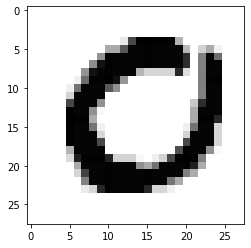

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mlt

plt.imshow(X[121].reshape(28, 28), cmap = mlt.cm.binary)
print(y[121])
plt.show()

In [ ]:
y = y.astype('int8')

y.dtype

dtype('int8')

In [ ]:
y_5 = (y == 5)

y_5

array([ True, False, False, ..., False,  True, False])

True


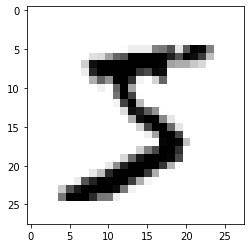

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mlt

plt.imshow(X[0].reshape(28, 28), cmap = mlt.cm.binary)
print(y_5[0])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train_5, y_test_5 = train_test_split(X, y_5)

In [ ]:
x_train.shape, x_test.shape, y_train_5.shape, y_test_5.shape

((52500, 784), (17500, 784), (52500,), (17500,))

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()

sgd.fit(x_train, y_train_5)

SGDClassifier()

In [ ]:
y_pred = sgd.predict(x_test)

In [ ]:
(y_pred == y_test_5).sum() / y_test_5.shape[0]

0.9278285714285714

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_5, y_pred)

0.9278285714285714

# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_5, y_pred)

array([[14777,  1152],
       [  111,  1460]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test_5, y_pred), recall_score(y_test_5, y_pred)

(0.55895865237366, 0.9293443666454487)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test_5, y_pred)

0.6980635907243605

# Precision Recall


![Screenshot_20220103_131814.png](https://raw.githubusercontent.com/aman5898/Pepcoding-Data-Science/main/Ch03_Classification/assets/Screenshot_20220103_131814.png)

In [ ]:
y_pred_value = sgd.decision_function(x_test)
y_pred_value

array([ -3741.84825892,  -2670.86651794,   -644.80285438, ...,
        -5505.09538978, -12845.48005748,  -2329.19080588])

In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(sgd, X, y_5, cv = 3, method='decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_5, y_pred)

In [ ]:
precisions.shape, recalls.shape, thresholds.shape

((69931,), (69931,), (69930,))

## Tradeoff

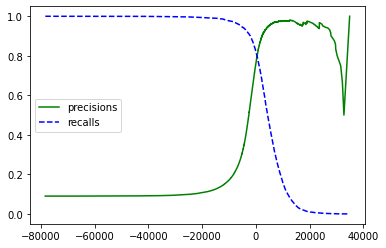

In [ ]:
import matplotlib.pyplot as plt

plt.plot(thresholds, precisions[:-1], 'g-', label = 'precisions', )
plt.plot(thresholds, recalls[:-1], 'b--', label = 'recalls', )

plt.legend()
plt.show()

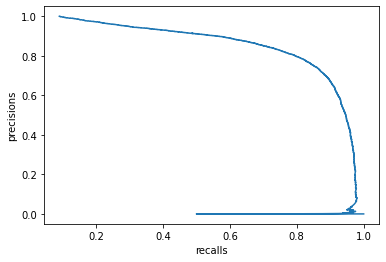

In [ ]:
plt.plot(precisions, recalls, label = 'roc')

plt.xlabel('recalls')
plt.ylabel('precisions')
plt.show()

# ROC Curve

**receiver operating characteristic**

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_5, y_pred)

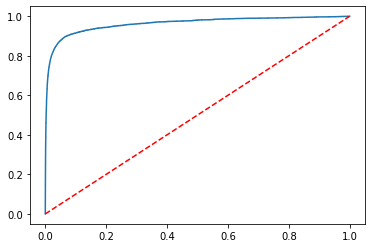

In [ ]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0, 1], 'r--')

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_5, y_pred)

0.9621170164712689

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
y_pred_rf = cross_val_predict(rf, X, y_5, cv = 3, method='predict_proba')


In [ ]:
import numpy as np

y_pred_01 = y_pred_rf[:, 1]

In [ ]:
fprRF, tprRF, thresholdRF = roc_curve(y_5, y_pred_01)

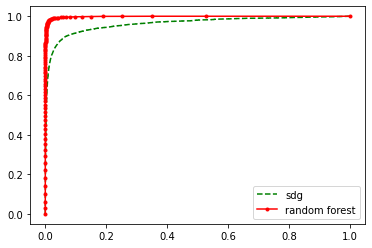

In [ ]:
plt.plot(fpr, tpr, 'g--', label = 'sdg')
plt.plot(fprRF, tprRF, 'r.-', label = 'random forest')

# plt.plot([0,1], [0, 1], 'r--')
plt.legend()
plt.show()

# Multiclass Classifier

![image.jpg](https://i.stack.imgur.com/La40O.jpg)

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf=OneVsOneClassifier(SGDClassifier())

y_pred = ovo_clf.fit(X, y)

In [ ]:
len(ovo_clf.estimators_)

45

## One Vs Rest Classifier

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf=OneVsRestClassifier(SGDClassifier())

y_pred = ovr_clf.fit(X, y)

In [ ]:
len(ovr_clf.estimators_)

10